## Dependencies

In [7]:
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import cv2
import imghdr

## Removing corrupt data

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'X:\\Neil\\Code\\coding IEEE\\CSV\\data'
os.listdir(os.path.join(data_dir,'cats'))

['07CAT-STRIPES-mediumSquareAt3X-v2.jpg',
 '1521-WIRED-Cat.jpeg',
 '17grumpycat-1-superJumbo.jpg',
 '203830.jpg',
 '203831.jpg',
 '220726-cat-theo-elise-ew-636p-6cd3b0.jpg',
 '32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg',
 '42-29316901.jpg',
 '516nfLDrN0L._AC_UF10001000_QL80_.jpg',
 '622378-cat.jpg',
 '640px-Cat03.jpg',
 '71YKFdJPUTL._AC_UF10001000_QL80_.jpg',
 '72295960.jpg',
 '75552.jpg',
 '800px-RedCat_8727.jpg',
 '98693286.jpg',
 'baby-big-orange-cat-2160x1200.jpg',
 'beautiful-smooth-haired-red-cat-lies-on-the-sofa-royalty-free-image-1678488026.jpg',
 'best-cute-cat-names-1660318806.jpeg',
 'canva-free-cute-funny-cat-mug-cup-EFT7PfWWv2c.jpg',
 'cat-10-e1573844975155.jpg',
 'cat-1200.jpg',
 'cat-2083492_640.jpg',
 'cat-2536662_640.jpg',
 'cat-551554_640.jpg',
 'Cat-andriyko-podilnyk-RCfi7vgJjUY-unsplash_1659328989095_1659328998370_1659328998370.jpg',
 'Cat-c6f5a79.jpg',
 'cat-quotes-1543599392.jpg',
 'Cat-Step-11-CW.jpg',
 'cat_1659882617172_1659882628989_1659882628989.jpg',
 'C

In [10]:
img_exts = ['png','jpeg','jpg','bmp']

In [23]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)

        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_exts:
                print('Image not included in the exts list {}'.format(img_path))
                os.remove(img_path)
        except:
            print('Issue with image:', img_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'X:\\Neil\\Code\\coding IEEE\\CSV\\data\\cattest.jpeg'

## Loading the data

In [24]:
tf.data.Dataset?? #?? gives u the documentation of the particular function

SyntaxError: invalid syntax (3951417820.py, line 1)

In [25]:
data = tf.keras.utils.image_dataset_from_directory('X:\\Neil\\Code\\coding IEEE\\CSV\\data')

Found 290 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [28]:
batch[0].shape

(32, 256, 256, 3)

In [29]:
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

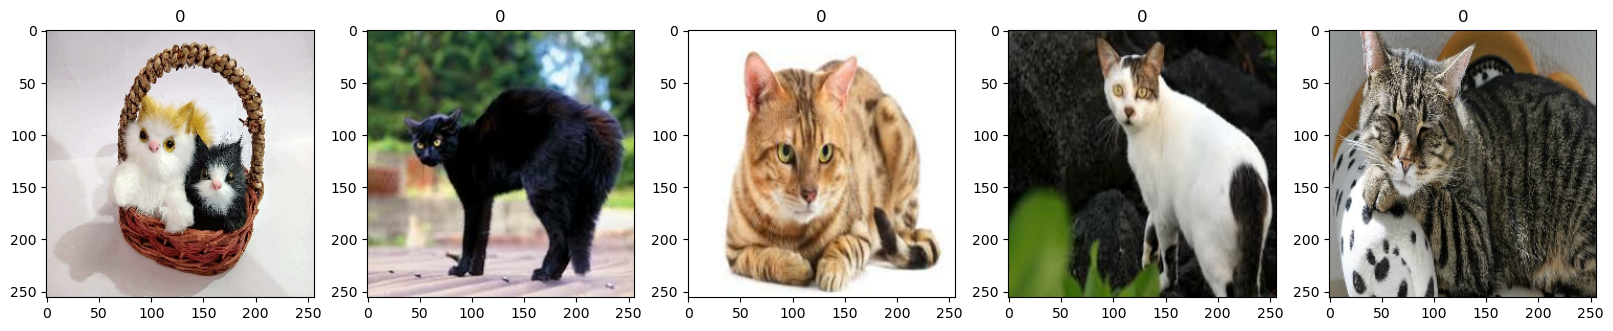

In [30]:
fig, ax = plt.subplots(ncols = 5, figsize =(20,20) )
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

### Scaling data

In [31]:
data = data.map(lambda x,y : (x/255,y))

In [32]:
scaled_data = data.as_numpy_iterator()

In [33]:
batch = scaled_data.next()

In [34]:
batch[0].max()

1.0

### Splitting data

In [35]:
len(data)

10

In [36]:
train_size = int((len(data) * 0.6))
val_size = int((len(data) * 0.3))
test_size = int((len(data) * 0.1))

In [37]:
train_size + val_size + test_size

10

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Learning Model

### building the model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.compile(optimizer = 'adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

### training the model

In [44]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
6/6 [==============================] - 31s 3s/step - loss: 1.2736 - accuracy: 0.5573 - val_loss: 0.6631 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 27s 3s/step - loss: 0.6891 - accuracy: 0.6094 - val_loss: 0.6534 - val_accuracy: 0.7083
Epoch 3/20
6/6 [==============================] - 27s 3s/step - loss: 0.6761 - accuracy: 0.6198 - val_loss: 0.6286 - val_accuracy: 0.6250
Epoch 4/20
6/6 [==============================] - 28s 3s/step - loss: 0.6454 - accuracy: 0.7135 - val_loss: 0.6508 - val_accuracy: 0.7188
Epoch 5/20
6/6 [==============================] - 28s 3s/step - loss: 0.6153 - accuracy: 0.6562 - val_loss: 0.5963 - val_accuracy: 0.6042
Epoch 6/20
6/6 [==============================] - 28s 3s/step - loss: 0.5333 - accuracy: 0.7760 - val_loss: 0.5308 - val_accuracy: 0.6979
Epoch 7/20
6/6 [==============================] - 29s 3s/step - loss: 0.5360 - accuracy: 0.7292 - val_loss: 0.4899 - val_accuracy: 0.7083
Epoch 8/20
6/6 [==================

In [45]:
hist.history

{'loss': [1.2736279964447021,
  0.6890960335731506,
  0.6761011481285095,
  0.6454013586044312,
  0.6152601838111877,
  0.5332991480827332,
  0.5360294580459595,
  0.4357419013977051,
  0.3521145284175873,
  0.23776094615459442,
  0.1784929782152176,
  0.11609721183776855,
  0.07494592666625977,
  0.05995194986462593,
  0.050591688603162766,
  0.05983143672347069,
  0.03345833346247673,
  0.0363449901342392,
  0.05691705644130707,
  0.11281442642211914],
 'accuracy': [0.5572916865348816,
  0.609375,
  0.6197916865348816,
  0.7135416865348816,
  0.65625,
  0.7760416865348816,
  0.7291666865348816,
  0.8385416865348816,
  0.8645833134651184,
  0.9166666865348816,
  0.9583333134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184,
  0.9947916865348816,
  0.9895833134651184,
  0.9947916865348816,
  0.9947916865348816,
  0.9895833134651184,
  0.9479166865348816],
 'val_loss': [0.6630812287330627,
  0.6533937454223633,
  0.6285735964775085,
  0.6508383750915527,
  0.59631

### plot performance

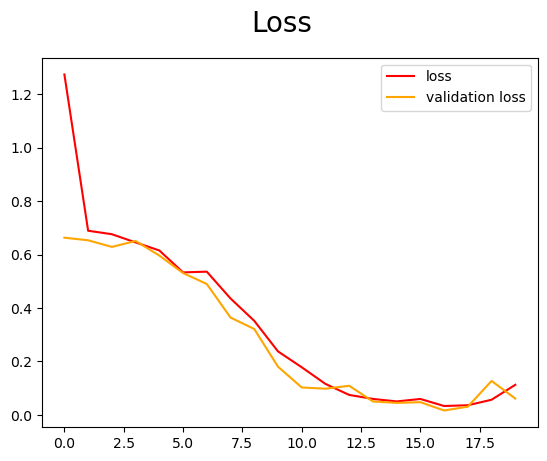

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = "loss")
plt.plot(hist.history['val_loss'], color = 'orange', label = "validation loss")
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

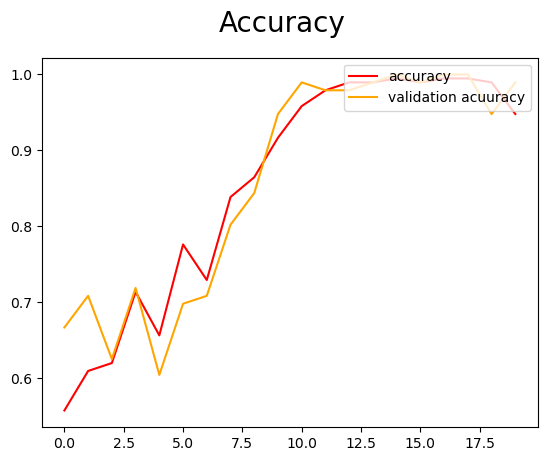

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'red', label = "accuracy")
plt.plot(hist.history['val_accuracy'], color = 'orange', label = "validation acuuracy")
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

# Evaluating and Testing the model

### Evaluating

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 356ms/step


In [51]:
print(f"precision: {precision.result()}, recall: {recall.result()}, accuracy: {accuracy.result()}")

precision: 1.0, recall: 1.0, accuracy: 1.0


### Testing 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


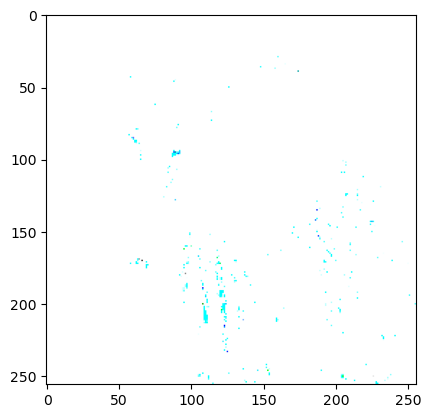

In [57]:
cv2.imread('X:\\Neil\\Code\\coding IEEE\\CSV\\data\\cattest.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

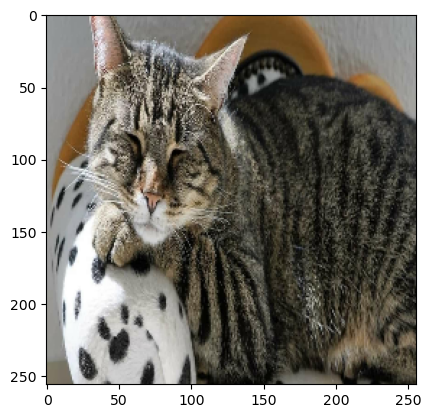

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 79ms/step


In [59]:
yhat

array([[0.00054034]], dtype=float32)

In [60]:
if yhat < 0.5:
    print("This is a cat")
else:
    print("This is a dog")

This is a cat
